# Introduction 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC

# Linear kernel 

In [2]:
data_1 = loadmat('ex6data1.mat')
X_1, y_1 = data_1['X'], data_1['y'].flatten()

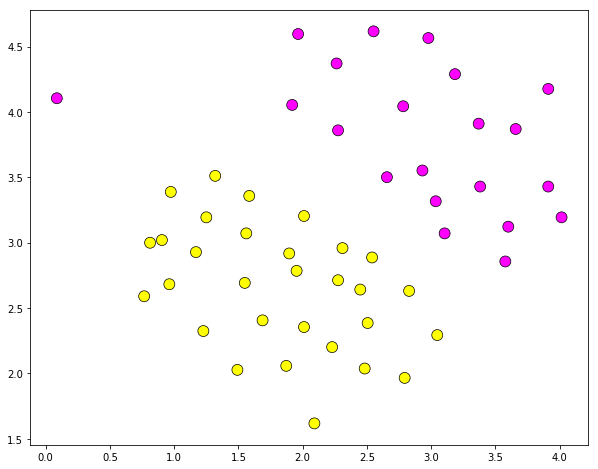

In [3]:
plt.figure(figsize= (10, 8))
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths = 0.7)
plt.show()

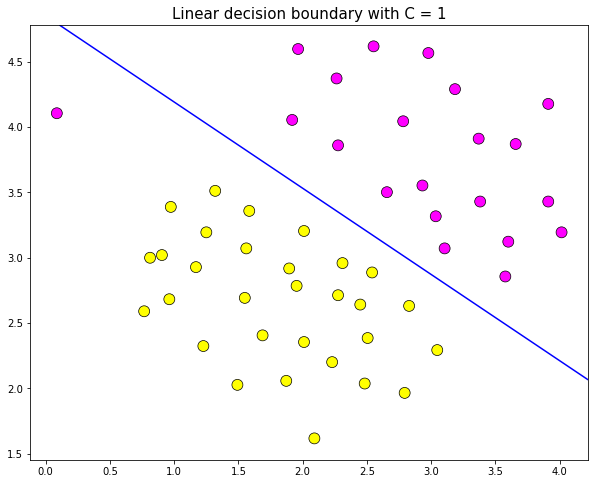

In [4]:
# fit the model
clf = SVC(kernel = 'linear', C = 1)
clf.fit(X_1, y_1)

# The original plot again 
plt.figure(figsize = (10, 8))
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths= 0.7)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'b', levels = 0, alpha = 1)
plt.title('Linear decision boundary with C = 1', size = 15)
plt.show()

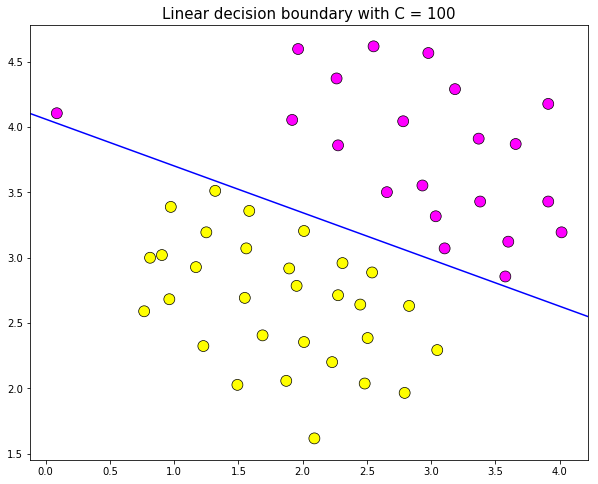

In [5]:
# fit the model
clf = SVC(kernel = 'linear', C = 100)
clf.fit(X_1, y_1)

# The original plot again 
plt.figure(figsize = (10, 8))
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths= 0.7)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'b', levels = 0, alpha = 1)
plt.title('Linear decision boundary with C = 100', size = 15)
plt.show()

# Custom linear kernel
  
### $ K(x, x') = \left< x, x' \right> $

In [6]:
def linear_kernel(X, Y):
    return np.dot(X, Y.T)

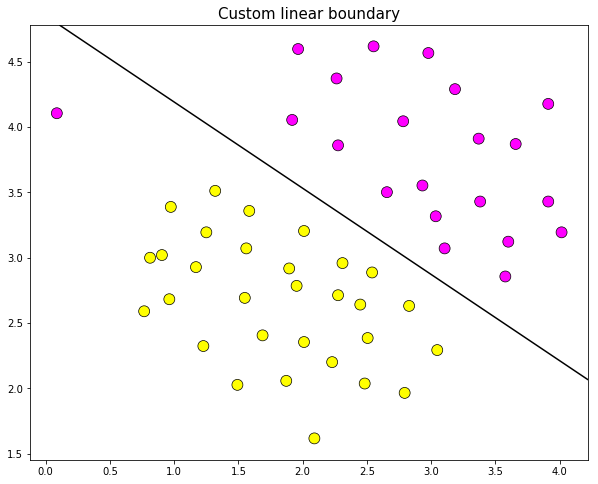

In [7]:
# fit the model
clf = SVC(kernel = linear_kernel)
clf.fit(X_1, y_1)

# The original plot again 
plt.figure(figsize = (10, 8))
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths= 0.7)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = 0, alpha = 1)
plt.title('Custom linear boundary', size = 15)
plt.show()

# Gaussian Kernel 

#### Gaussian kernel:  
### $ K(x, x') = \exp\left( - \frac{\sum_{i = 1}^{n} (x - x')^2}{2 \sigma ^2} \right) $

In [8]:
def gaussian_kernel(x1, x2, sigma = 2):
    diff_sq = np.square(x1 - x2)
    diff_sq_sum = np.sum(diff_sq)
    return np.exp(- diff_sq_sum/(2 * sigma ** 2))

In [9]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

# Non linear boundary 

Scikit learn has the default kernel called radial basis function or RBF for short. 

### $ K(x,x') = \exp(-\gamma || x - x' ||^2  )) $

Identifying $ \gamma = \frac{1}{2 \sigma^2} $, we can see that this is gaussian kernel. 

In [10]:
data_2 = loadmat('ex6data2.mat')
X_2, y_2 = data_2['X'], data_2['y'].flatten()

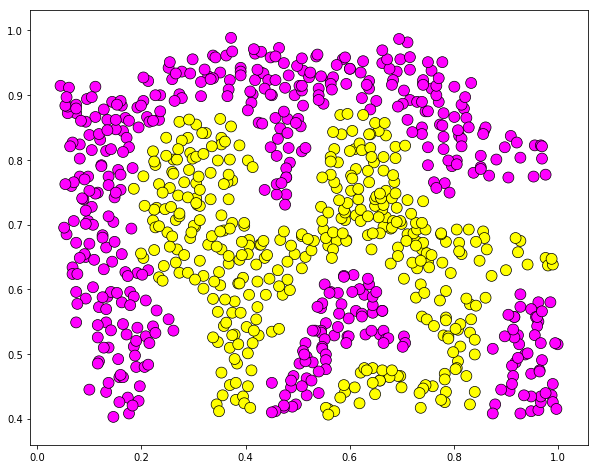

In [11]:
plt.figure(figsize= (10, 8))
plt.scatter(X_2[:, 0], X_2[:, 1], c = y_2, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths= 0.7)
plt.show()

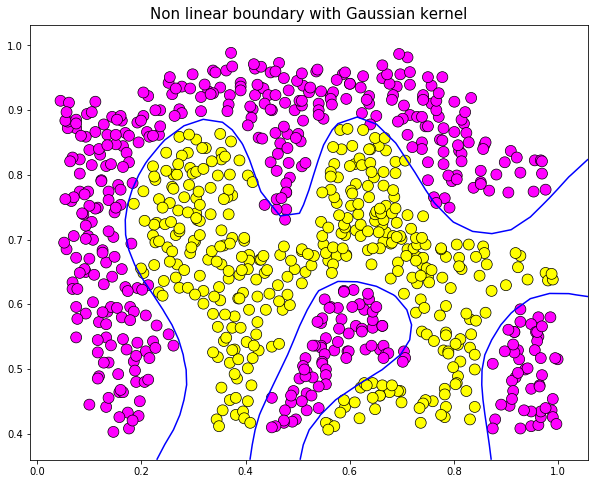

In [12]:
# fit the model
clf = SVC(kernel = 'rbf', C = 50,  gamma = 20)
clf.fit(X_2, y_2)

# The original plot again 
plt.figure(figsize = (10, 8))
plt.scatter(X_2[:, 0], X_2[:, 1], c = y_2, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths= 0.7)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'b', levels = 0, alpha = 1)
plt.title('Non linear boundary with Gaussian kernel', size = 15)
plt.show()

# Custom non linear kernel 

#### Polynomial kernel:  
### $ K(x, x') = \left(\gamma \left<x, x' \right> + r\right)^d $

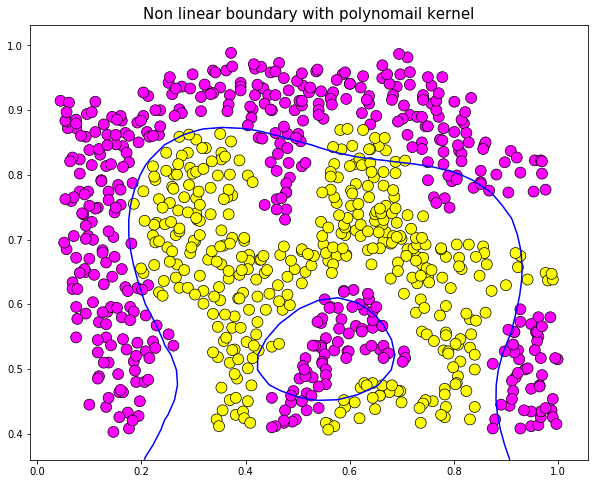

In [13]:
def my_kernel(X, Y):
    return np.power(2 * np.dot(X, Y.T) + 5, 6)

# fit the model
clf = SVC(kernel = my_kernel)
clf.fit(X_2, y_2)

# The original plot again 
plt.figure(figsize = (10, 8))
plt.scatter(X_2[:, 0], X_2[:, 1], c = y_2, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths= 0.7)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'b', levels = 0, alpha = 1)
plt.title('Non linear boundary with polynomail kernel', size = 15)
plt.show()

# Large overlap 

Here the dataset have large number of data point in the wrong side of the decision boundary. 

In [14]:
data_3 = loadmat('ex6data3.mat')
X_3, y_3 = data_3['X'], data_3['y'].flatten()

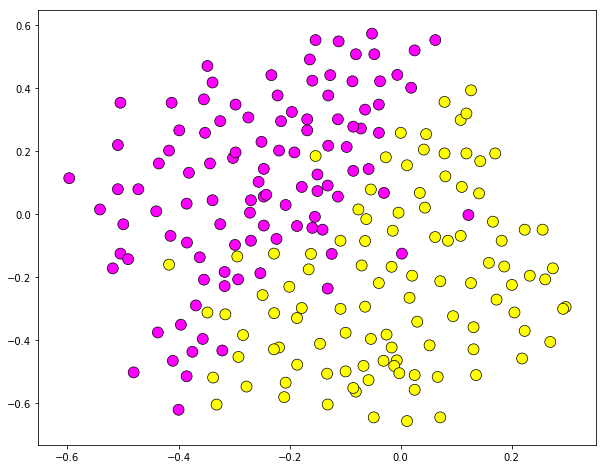

In [15]:
plt.figure(figsize= (10, 8))
plt.scatter(X_3[:, 0], X_3[:, 1], c = y_3, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths= 0.7)
plt.show()

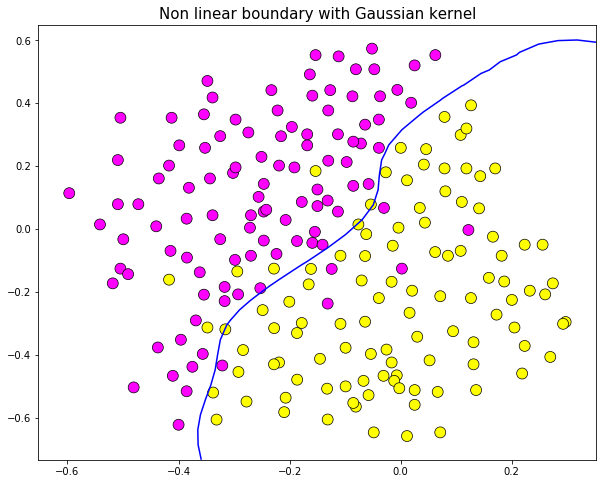

In [16]:
# fit the model
clf = SVC(kernel = 'rbf', C = 5,  gamma = 25)
clf.fit(X_3, y_3)

# The original plot again 
plt.figure(figsize = (10, 8))
plt.scatter(X_3[:, 0], X_3[:, 1], c = y_3, cmap = 'spring_r', s = 120, \
            edgecolors = 'k', linewidths= 0.7)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'b', levels = 0, alpha = 1)
plt.title('Non linear boundary with Gaussian kernel', size = 15)
plt.show()